In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Documents\CTR Project\\train.csv')

In [3]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
df.shape

(1888, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [6]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [7]:
df['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [8]:
#numerical variables
numerical=[var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))


There are 21 numerical variables


In [9]:
#continuous variables
continuous=[var for var in numerical if var not in['click_rate']]
print("Continuous feature Count {}".format(len(continuous)))

Continuous feature Count 20


c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

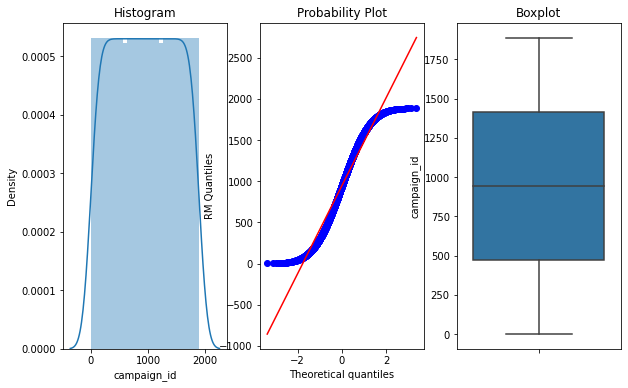

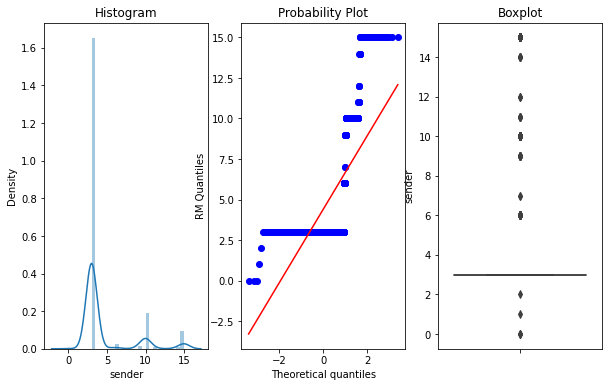

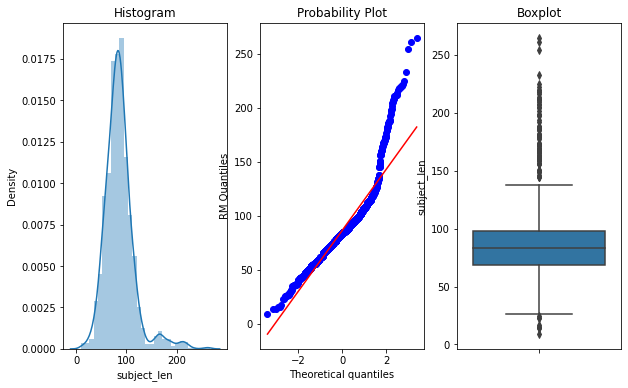

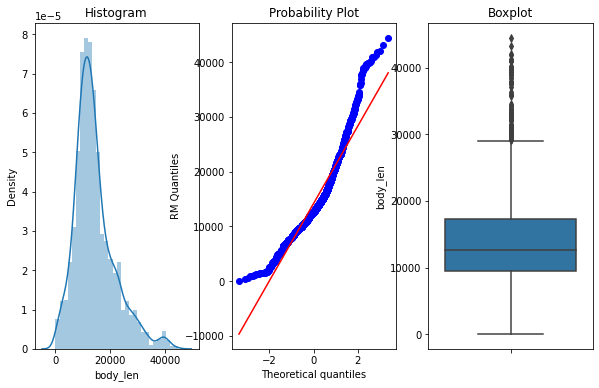

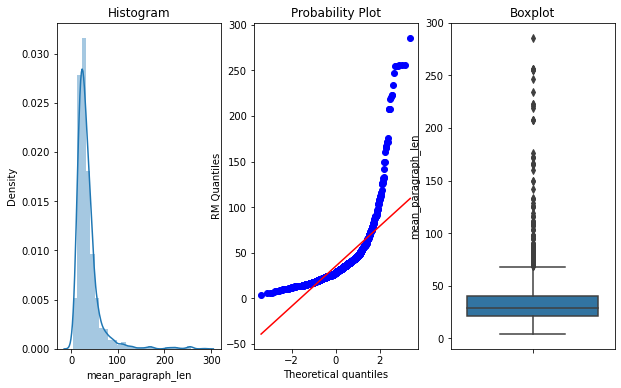

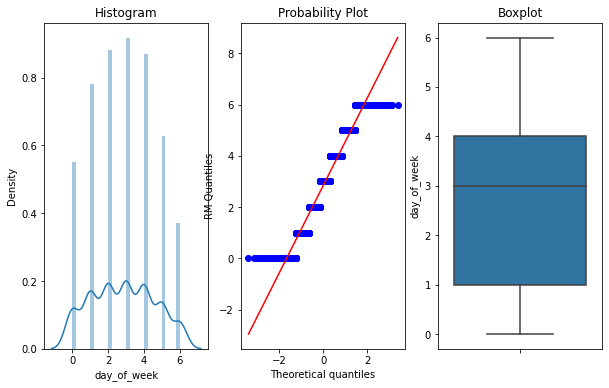

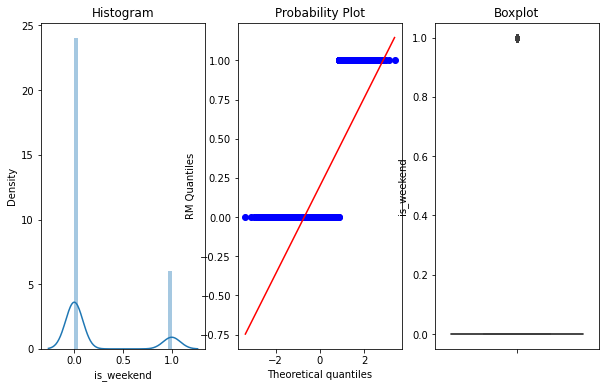

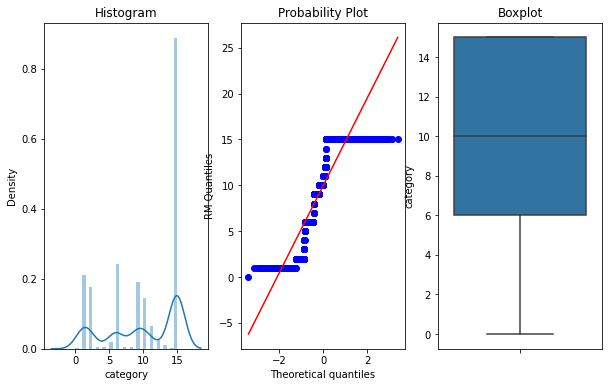

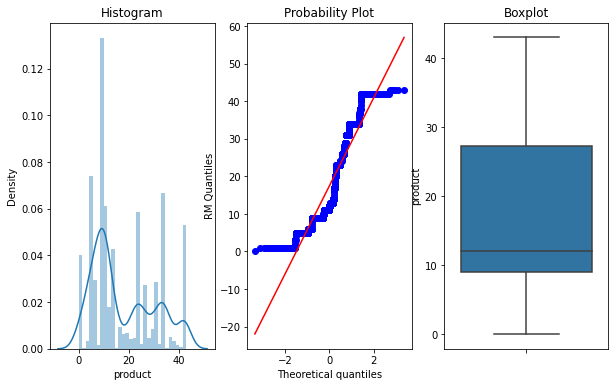

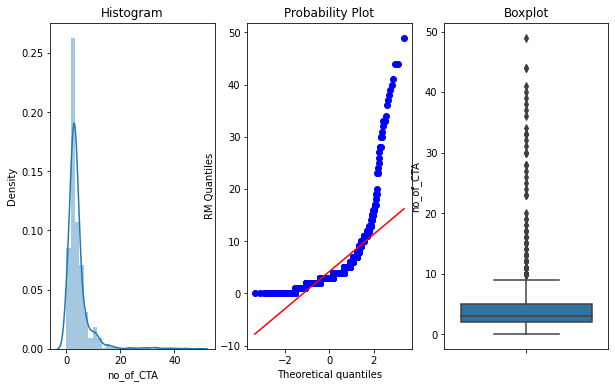

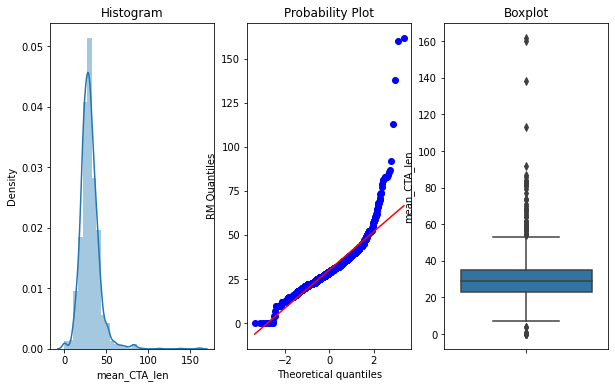

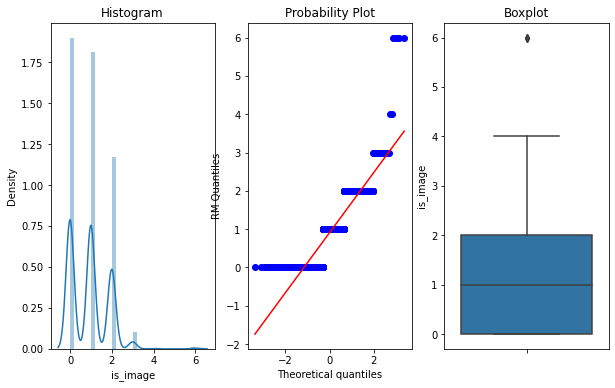

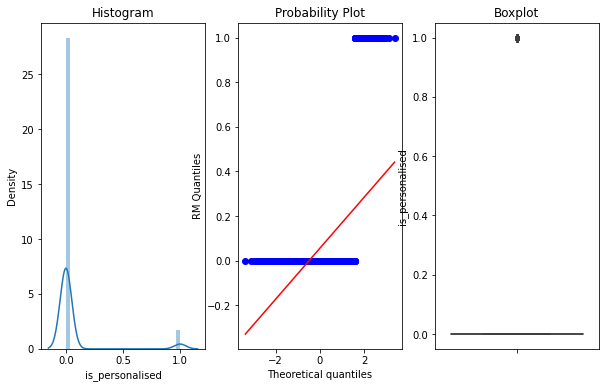

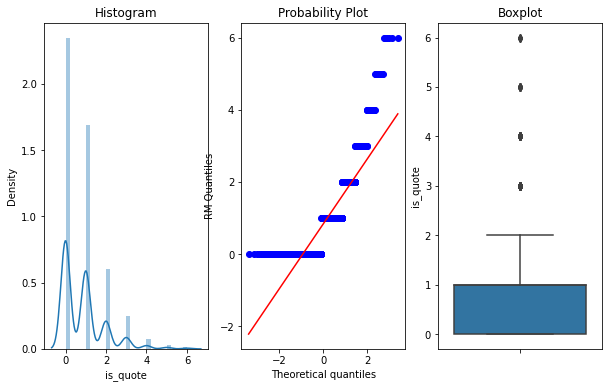

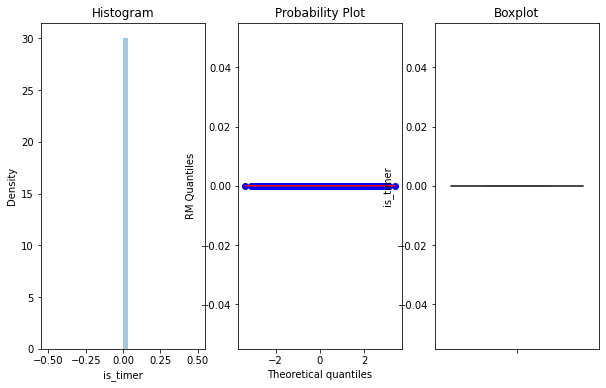

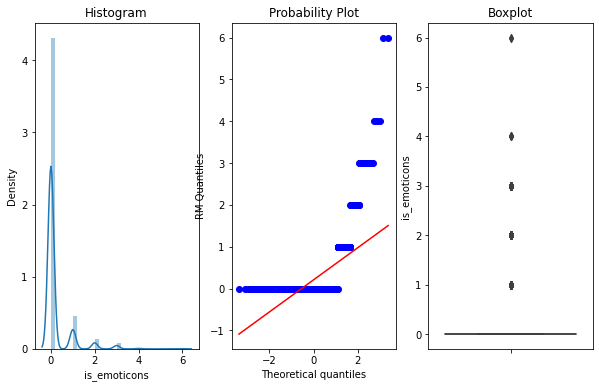

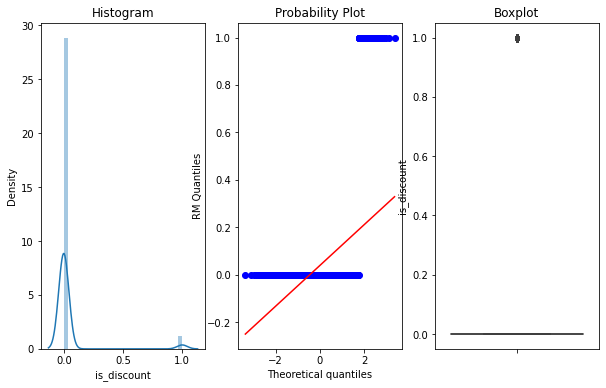

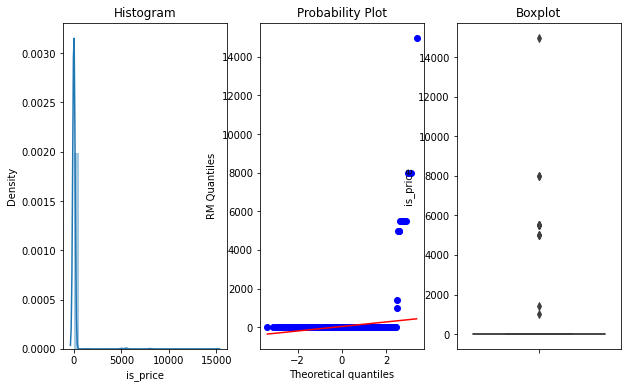

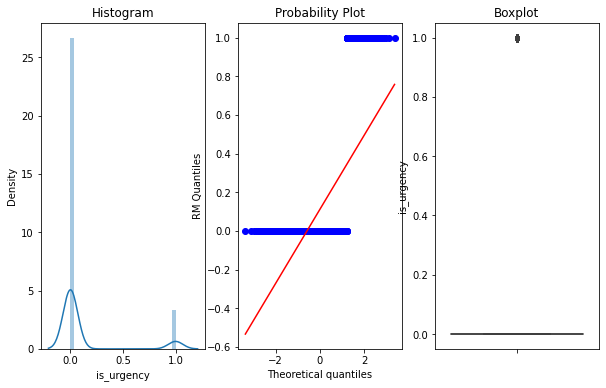

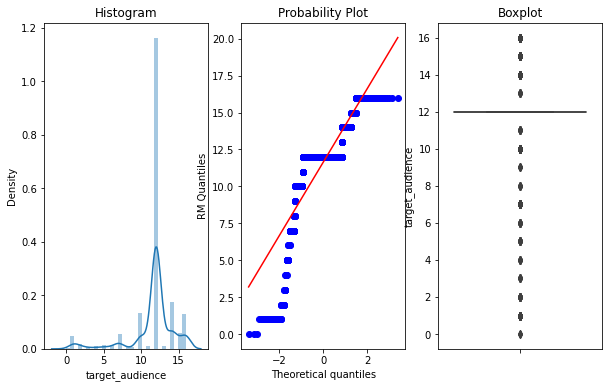

In [10]:
import scipy.stats as stats
import seaborn as sns
def dig_plot(d,var):
    plt.figure(figsize=(10,6))
    
    #dist
    plt.subplot(1,3,1)
    sns.distplot(d[var],bins=30)
    plt.title("Histogram")
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(d[var],dist="norm",plot=plt)
    plt.ylabel("RM Quantiles")
    
    #box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=d[var])
    plt.title("Boxplot")
for var in continuous:
    dig_plot(df,var)

In [11]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [12]:
df['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6], dtype=int64)

In [13]:
df['day_of_week'].unique()

array([5, 4, 3, 2, 1, 0, 6], dtype=int64)

In [14]:
df['category'].unique()

array([ 6,  2, 15,  1,  7, 10,  9, 12,  4,  3,  0, 13, 11, 14,  8,  5],
      dtype=int64)

In [15]:
df['target_audience'].unique()

array([14, 10, 16, 13,  6, 15, 12,  0,  4, 11,  1,  5,  7,  2,  3,  8,  9],
      dtype=int64)

In [16]:
df.drop(['campaign_id'],axis=1,inplace=True)
df.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,Noon,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826


In [17]:
df.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')

Text(0.5, 1.0, 'Sender to CR')

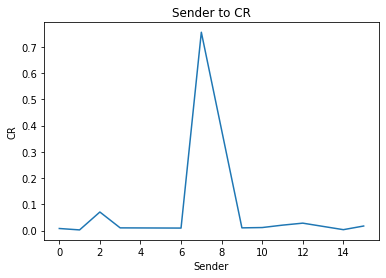

In [18]:
df.groupby('sender')['click_rate'].median().plot()
plt.xlabel('Sender')
plt.ylabel('CR')
plt.title("Sender to CR")

Text(0.5, 1.0, 'subject_len to CR')

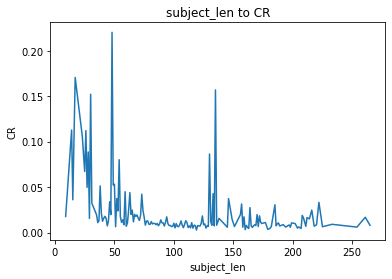

In [19]:
df.groupby('subject_len')['click_rate'].median().plot()
plt.xlabel('subject_len')
plt.ylabel('CR')
plt.title("subject_len to CR")

Text(0.5, 1.0, 'body_len to CR')

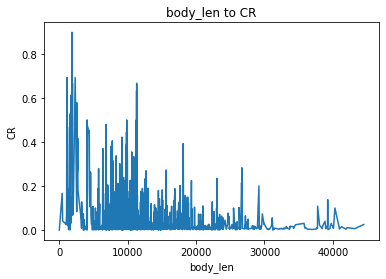

In [20]:
df.groupby('body_len')['click_rate'].median().plot()
plt.xlabel('body_len')
plt.ylabel('CR')
plt.title("body_len to CR")

Text(0.5, 1.0, 'mean_paragraph_len to CR')

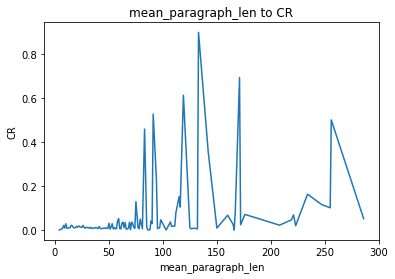

In [21]:
df.groupby('mean_paragraph_len')['click_rate'].median().plot()
plt.xlabel('mean_paragraph_len')
plt.ylabel('CR')
plt.title("mean_paragraph_len to CR")

Text(0.5, 1.0, 'day_of_week to CR')

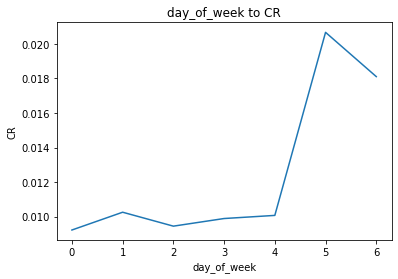

In [22]:
df.groupby('day_of_week')['click_rate'].median().plot()
plt.xlabel('day_of_week')
plt.ylabel('CR')
plt.title("day_of_week to CR")

Text(0.5, 1.0, 'is_weekend to CR')

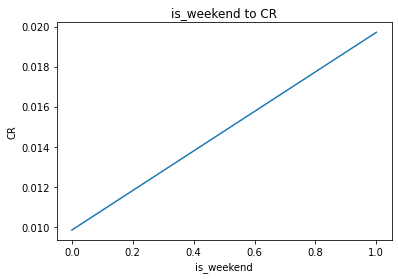

In [23]:
df.groupby('is_weekend')['click_rate'].median().plot()
plt.xlabel('is_weekend')
plt.ylabel('CR')
plt.title("is_weekend to CR")

Text(0.5, 1.0, 'times_of_day to CR')

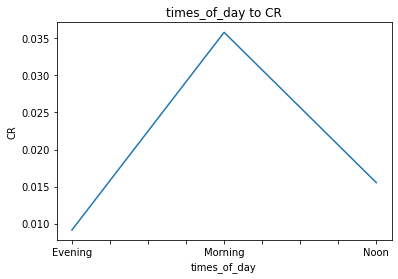

In [24]:
df.groupby('times_of_day')['click_rate'].median().plot()
plt.xlabel('times_of_day')
plt.ylabel('CR')
plt.title("times_of_day to CR")

Text(0.5, 1.0, 'category to CR')

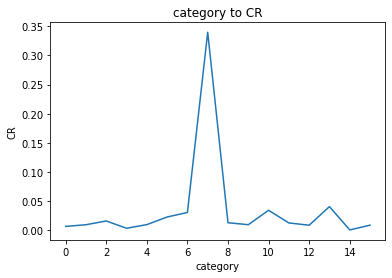

In [25]:
df.groupby('category')['click_rate'].median().plot()
plt.xlabel('category')
plt.ylabel('CR')
plt.title("category to CR")

Text(0.5, 1.0, 'product to CR')

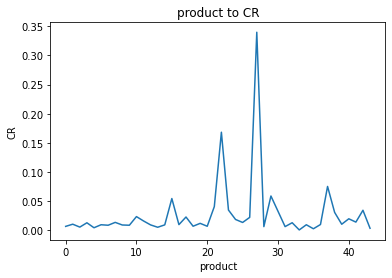

In [26]:
df.groupby('product')['click_rate'].median().plot()
plt.xlabel('product')
plt.ylabel('CR')
plt.title("product to CR")

Text(0.5, 1.0, 'no_of_CTA to CR')

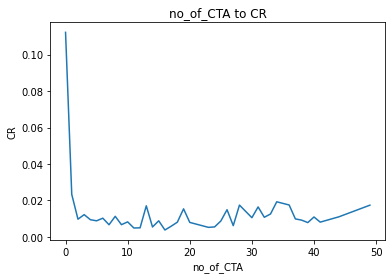

In [27]:
df.groupby('no_of_CTA')['click_rate'].median().plot()
plt.xlabel('no_of_CTA')
plt.ylabel('CR')
plt.title("no_of_CTA to CR")

Text(0.5, 1.0, 'mean_CTA_len to CR')

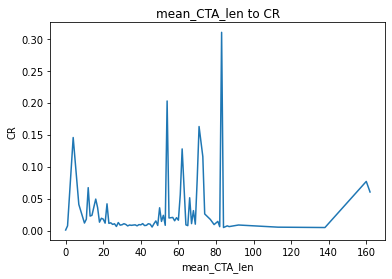

In [28]:
df.groupby('mean_CTA_len')['click_rate'].median().plot()
plt.xlabel('mean_CTA_len')
plt.ylabel('CR')
plt.title("mean_CTA_len to CR")

Text(0.5, 1.0, 'is_image to CR')

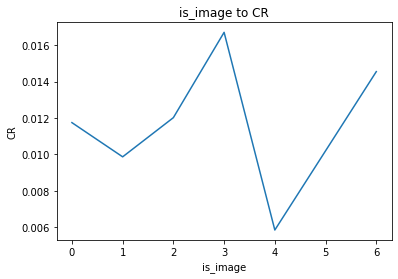

In [29]:
df.groupby('is_image')['click_rate'].median().plot()
plt.xlabel('is_image')
plt.ylabel('CR')
plt.title("is_image to CR")

Text(0.5, 1.0, 'is_personalised to CR')

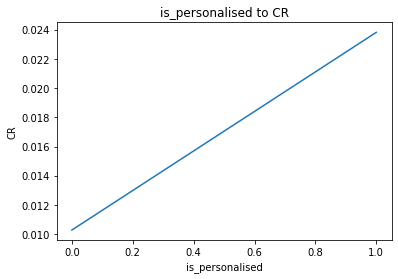

In [30]:
df.groupby('is_personalised')['click_rate'].median().plot()
plt.xlabel('is_personalised')
plt.ylabel('CR')
plt.title("is_personalised to CR")

Text(0.5, 1.0, 'is_quote to CR')

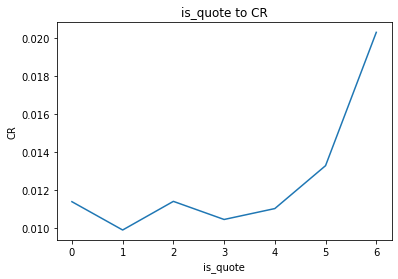

In [31]:
df.groupby('is_quote')['click_rate'].median().plot()
plt.xlabel('is_quote')
plt.ylabel('CR')
plt.title("is_quote to CR")

Text(0.5, 1.0, 'is_timer to CR')

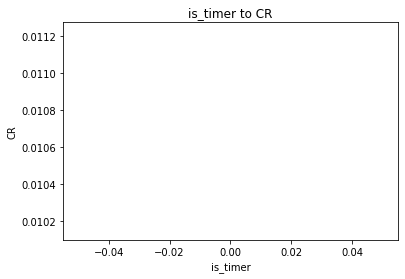

In [32]:
df.groupby('is_timer')['click_rate'].median().plot()
plt.xlabel('is_timer')
plt.ylabel('CR')
plt.title("is_timer to CR")

Text(0.5, 1.0, 'is_emoticons to CR')

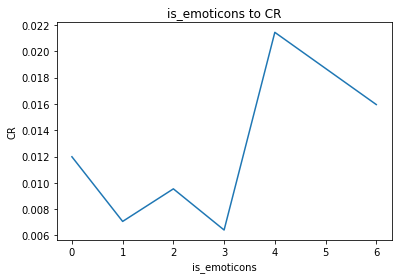

In [33]:
df.groupby('is_emoticons')['click_rate'].median().plot()
plt.xlabel('is_emoticons')
plt.ylabel('CR')
plt.title("is_emoticons to CR")

Text(0.5, 1.0, 'is_discount to CR')

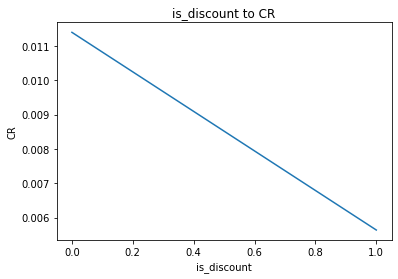

In [34]:
df.groupby('is_discount')['click_rate'].median().plot()
plt.xlabel('is_discount')
plt.ylabel('CR')
plt.title("is_discount to CR")

Text(0.5, 1.0, 'is_price to CR')

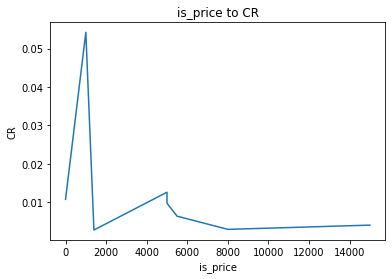

In [35]:
df.groupby('is_price')['click_rate'].median().plot()
plt.xlabel('is_price')
plt.ylabel('CR')
plt.title("is_price to CR")

Text(0.5, 1.0, 'is_urgency to CR')

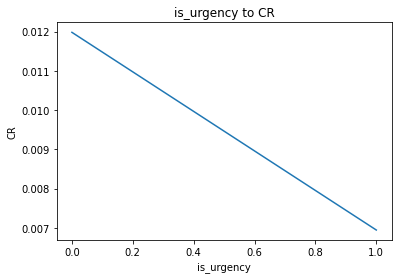

In [36]:
df.groupby('is_urgency')['click_rate'].median().plot()
plt.xlabel('is_urgency')
plt.ylabel('CR')
plt.title("is_urgency to CR")

Text(0.5, 1.0, 'target_audience to CR')

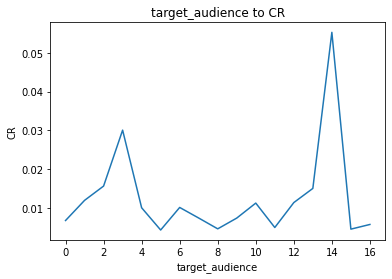

In [37]:
df.groupby('target_audience')['click_rate'].median().plot()
plt.xlabel('target_audience')
plt.ylabel('CR')
plt.title("target_audience to CR")

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Different Times of Day')

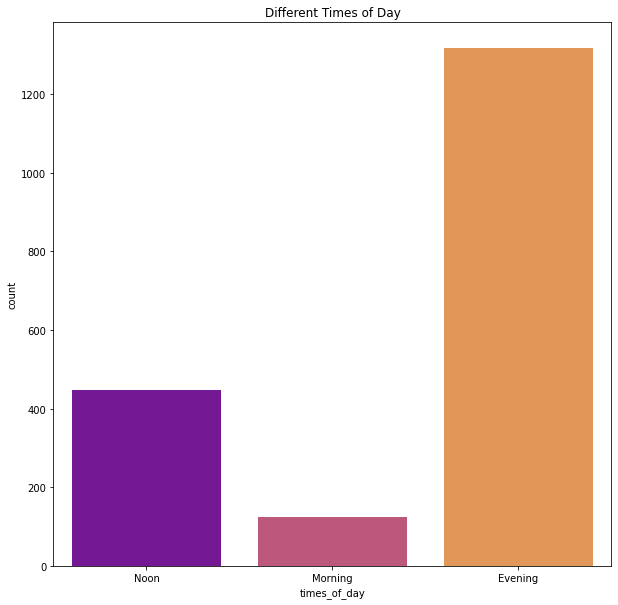

In [38]:
sns.countplot(df['times_of_day'], palette="plasma")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Different Times of Day')

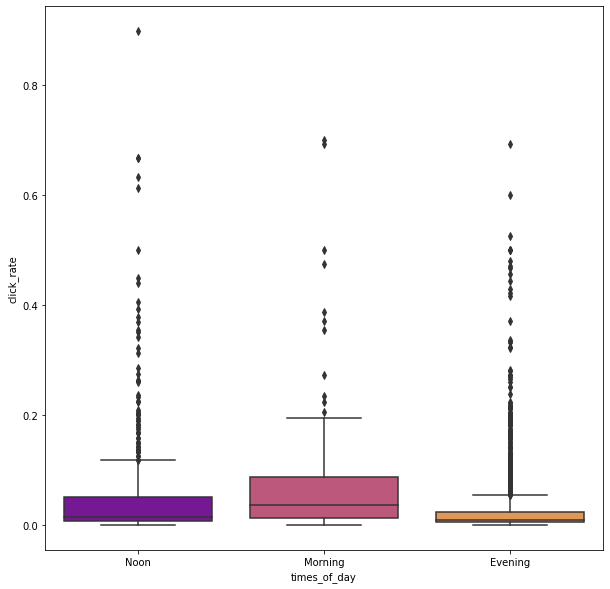

In [39]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='times_of_day',y='click_rate',palette='plasma')

In [40]:
df['is_discount'].unique()

array([0, 1], dtype=int64)

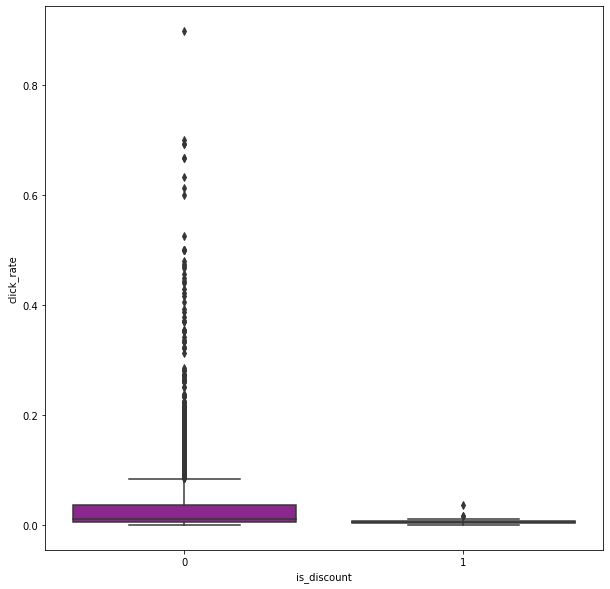

In [41]:
plt.figure(figsize=(10,10))
bx = sns.boxplot(data=df, x='is_discount',y='click_rate',palette='plasma')

In [42]:
df['is_timer'].unique()

array([0], dtype=int64)

In [43]:
df['is_emoticons'].unique()

array([0, 2, 1, 3, 4, 6], dtype=int64)

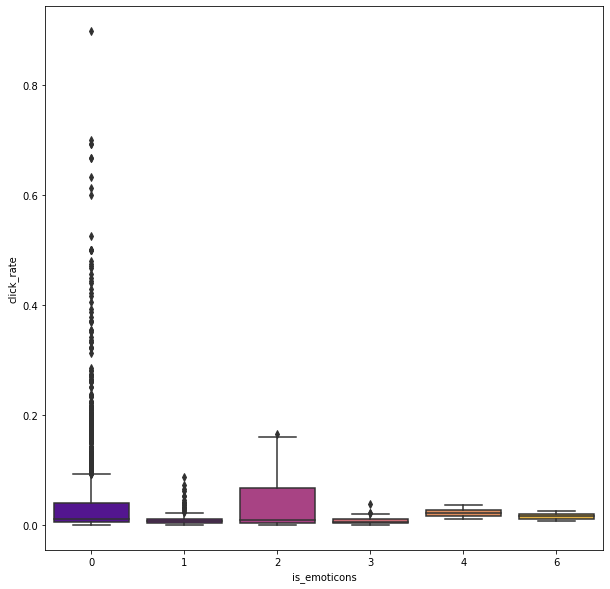

In [44]:
plt.figure(figsize=(10,10))
bx = sns.boxplot(data=df, x='is_emoticons',y='click_rate',palette='plasma')

In [45]:
df['is_urgency'].unique()

array([0, 1], dtype=int64)

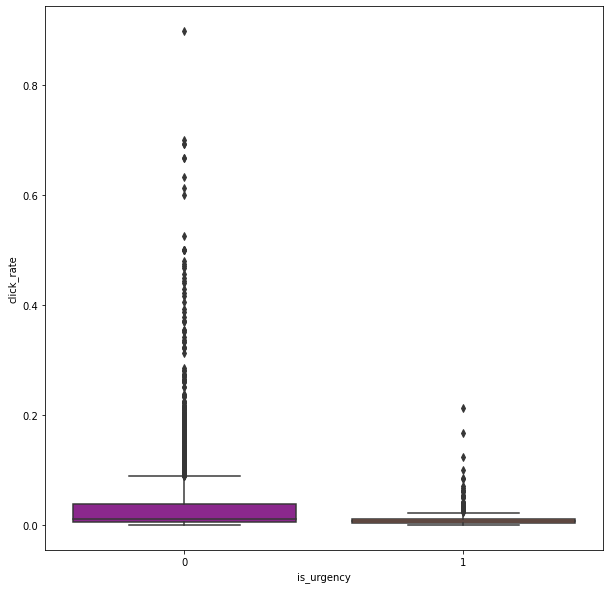

In [46]:
plt.figure(figsize=(10,10))
bx = sns.boxplot(data=df, x='is_urgency',y='click_rate',palette='plasma')

In [47]:
df['is_personalised'].unique()

array([0, 1], dtype=int64)

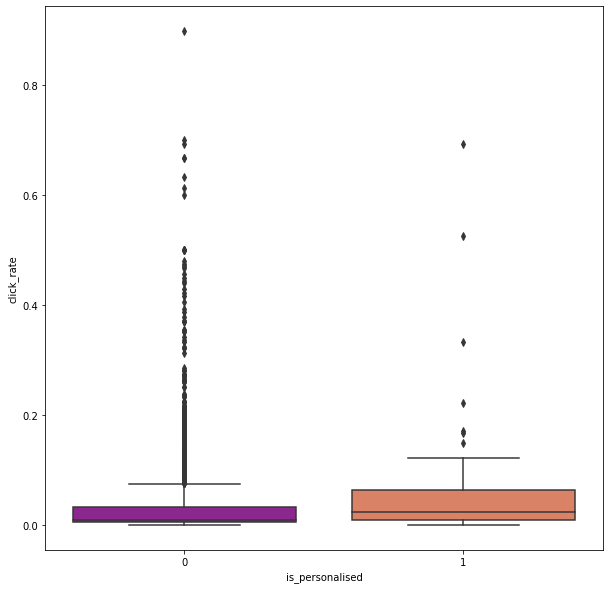

In [48]:
plt.figure(figsize=(10,10))
bx = sns.boxplot(data=df, x='is_personalised',y='click_rate',palette='plasma')

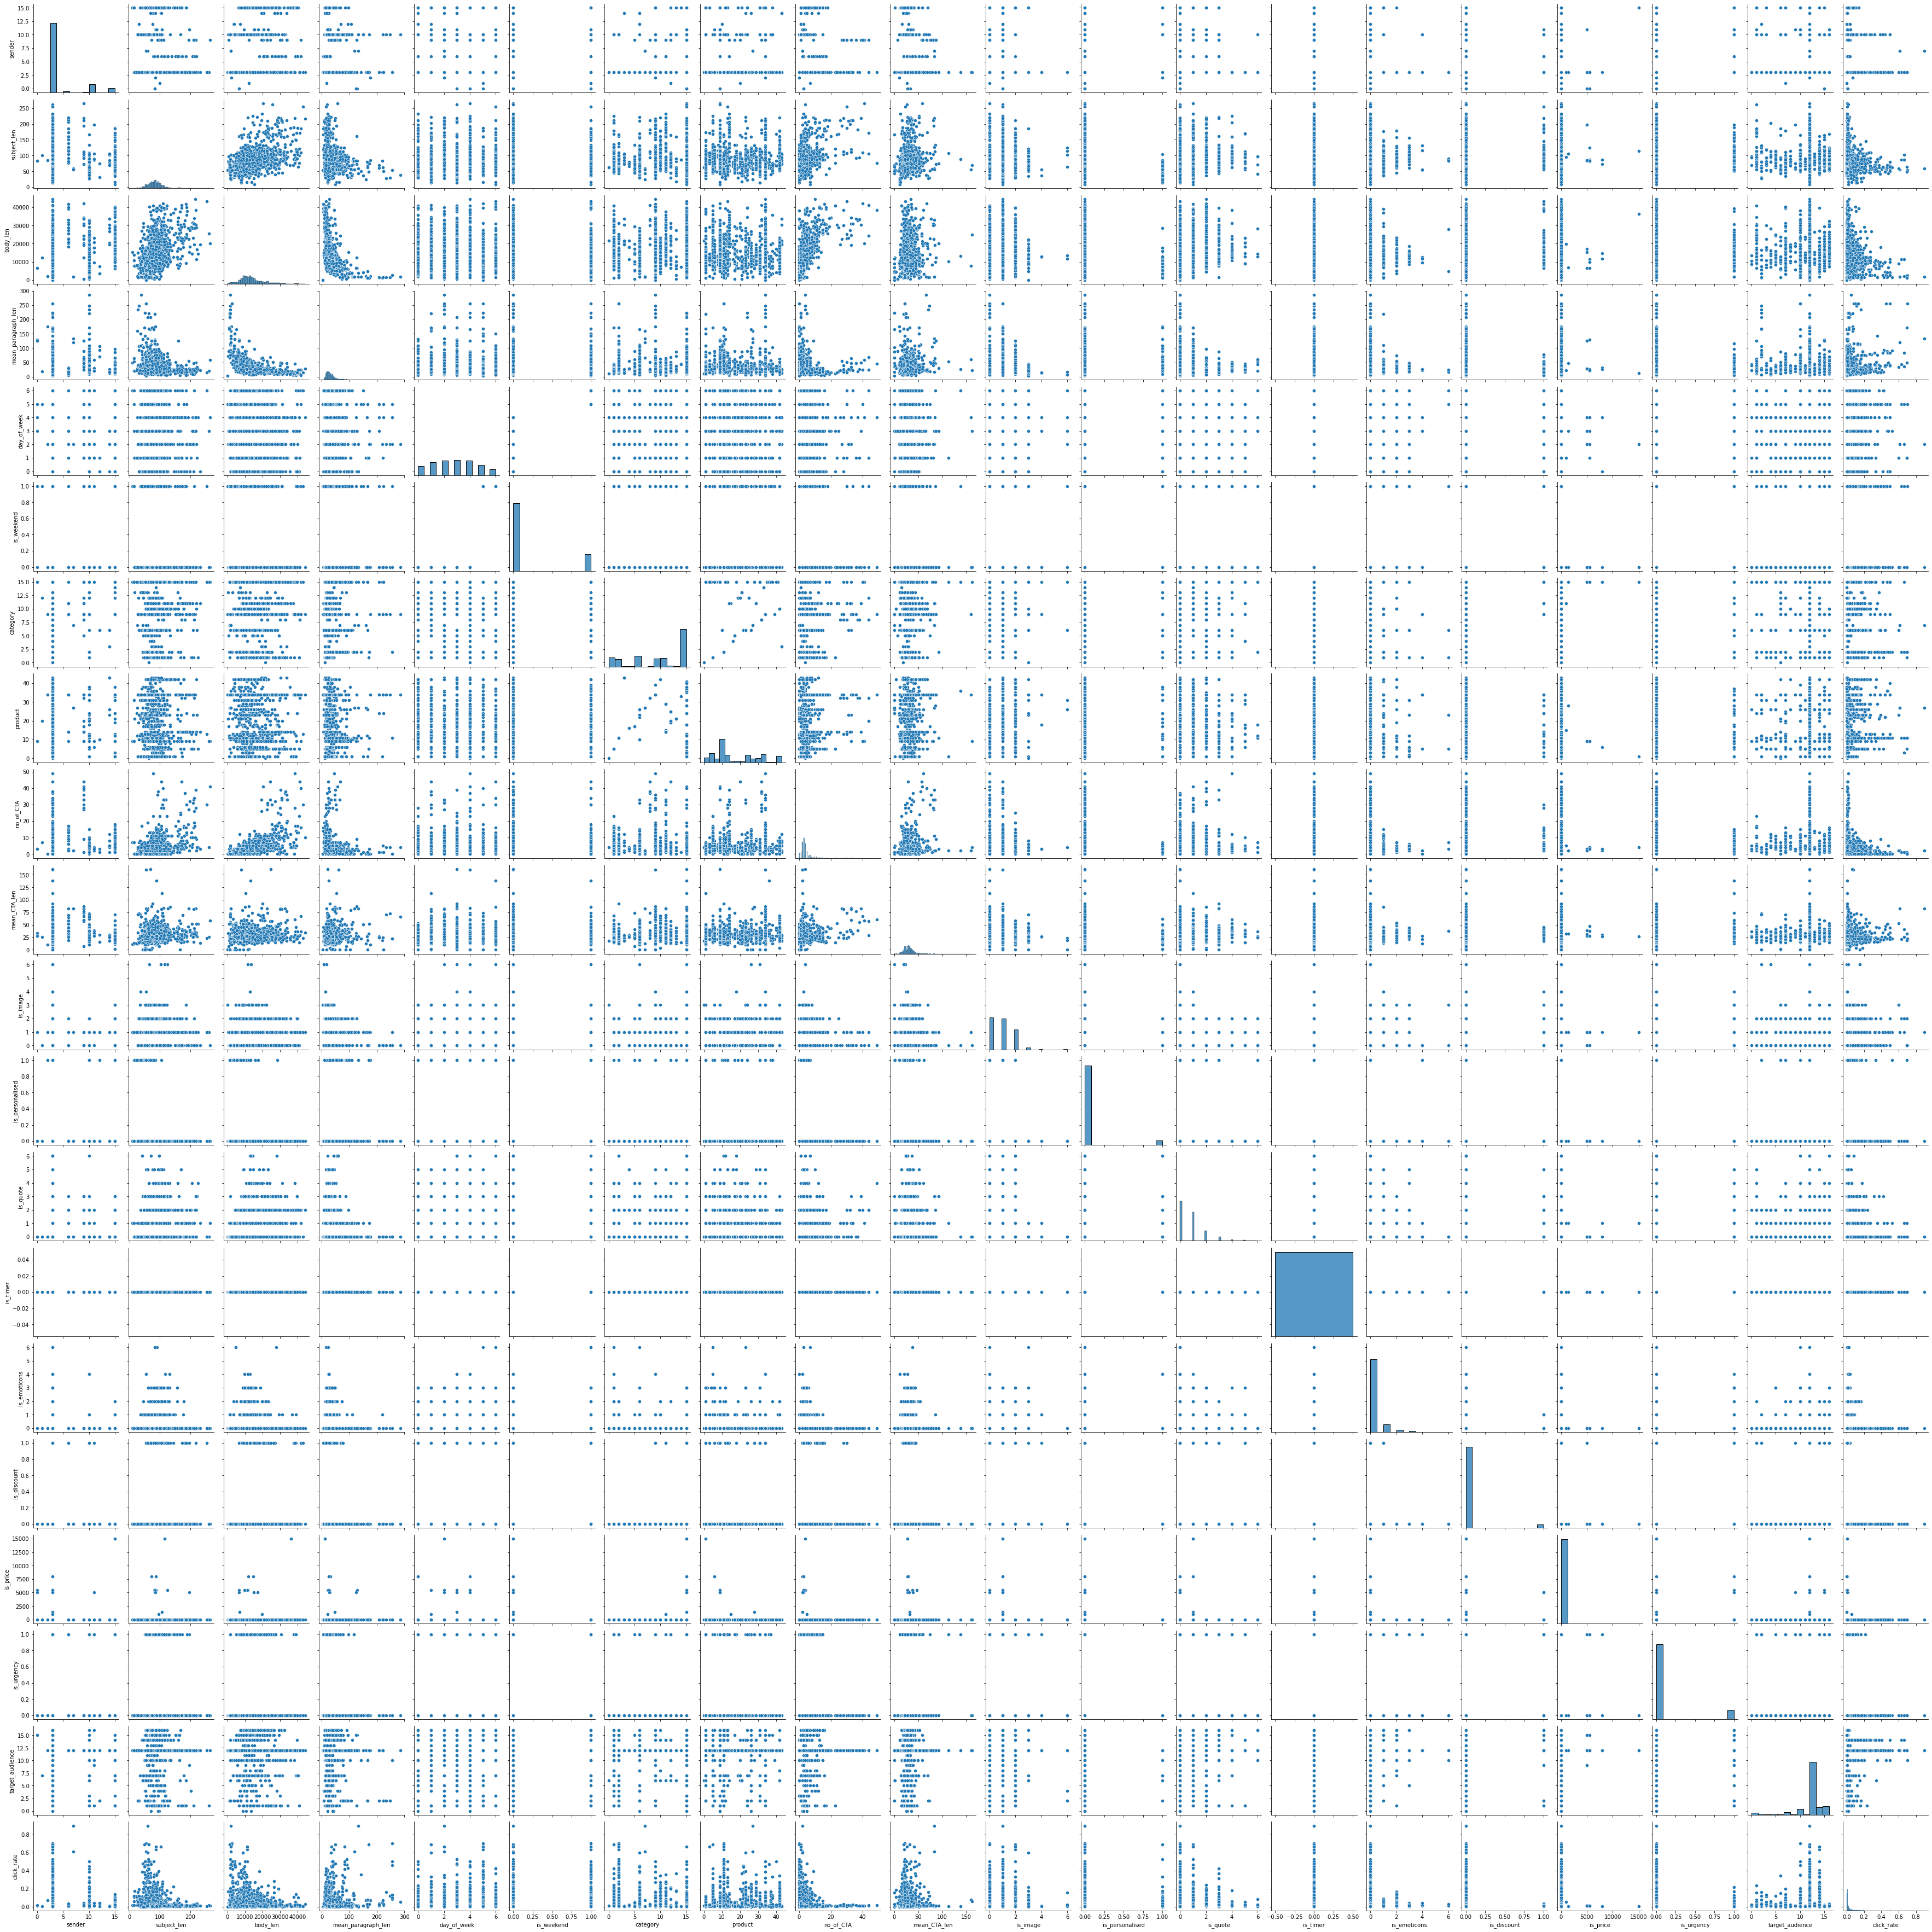

In [49]:
sns.pairplot(df)

In [50]:
df.drop(['is_timer'],axis=1,inplace=True)

In [51]:
df1 = df.copy()
df1 = pd.get_dummies(df1, columns=['times_of_day'], prefix = ['times_of_day'],drop_first=True)
df1.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,times_of_day_Morning,times_of_day_Noon
0,3,76,10439,39,5,1,6,26,3,29,...,0,0,0,0,0,0,14,0.103079,0,1
1,3,54,2570,256,5,1,2,11,0,22,...,0,0,0,0,0,0,10,0.700000,1,0
2,3,59,12801,16,5,1,2,11,3,23,...,0,1,0,0,0,0,16,0.002769,0,1
3,3,74,11037,30,4,0,15,9,4,24,...,0,0,0,0,0,0,10,0.010868,0,0
4,3,80,10011,27,5,1,6,26,3,31,...,0,1,0,0,0,0,14,0.142826,0,1


<AxesSubplot:>

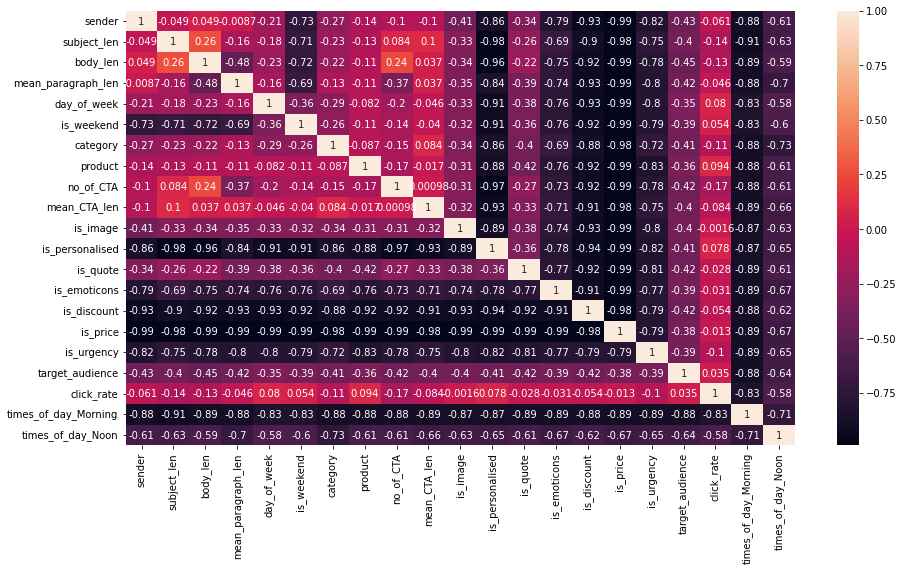

In [52]:
import seaborn as sns
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [53]:
df1.drop(['subject_len', 'body_len',
       'is_weekend','category',
       'no_of_CTA', 'is_image',
       'is_emoticons', 'is_discount','is_urgency'],axis=1,inplace=True)

In [54]:
df1.head()

,sender,mean_paragraph_len,day_of_week,product,mean_CTA_len,is_personalised,is_quote,is_price,target_audience,click_rate,times_of_day_Morning,times_of_day_Noon
0,3,39,5,26,29,0,0,0,14,0.103079,0,1
1,3,256,5,11,22,0,0,0,10,0.700000,1,0
2,3,16,5,11,23,0,1,0,16,0.002769,0,1
3,3,30,4,9,24,0,0,0,10,0.010868,0,0
4,3,27,5,26,31,0,1,0,14,0.142826,0,1


In [55]:
df1.shape

(1888, 12)

In [56]:
df1.columns

Index(['sender', 'mean_paragraph_len', 'day_of_week', 'product',
       'mean_CTA_len', 'is_personalised', 'is_quote', 'is_price',
       'target_audience', 'click_rate', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [57]:
X=df1.copy()

In [58]:
y=df1['click_rate']
y

0       0.103079
1       0.700000
2       0.002769
3       0.010868
4       0.142826
          ...   
1883    0.350746
1884    0.004728
1885    0.008289
1886    0.012014
1887    0.003644
Name: click_rate, Length: 1888, dtype: float64

In [59]:
X.drop(['click_rate'],axis=1,inplace=True)
X.head()

,sender,mean_paragraph_len,day_of_week,product,mean_CTA_len,is_personalised,is_quote,is_price,target_audience,times_of_day_Morning,times_of_day_Noon
0,3,39,5,26,29,0,0,0,14,0,1
1,3,256,5,11,22,0,0,0,10,1,0
2,3,16,5,11,23,0,1,0,16,0,1
3,3,30,4,9,24,0,0,0,10,0,0
4,3,27,5,26,31,0,1,0,14,0,1


In [60]:
X.shape

(1888, 11)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
X_train.shape

(1510, 11)

In [64]:
y_test.shape

(378,)

In [65]:
X_test.shape

(378, 11)

In [66]:
y_test.shape

(378,)

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [68]:
lrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [69]:
lrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [70]:
lr_pred=lrpipe.predict(X_test)

In [71]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
579,0.009055,0.027185
1183,0.210526,0.032251
1010,0.036747,0.046299
1527,0.018026,0.047596
77,0.002068,0.024132
...,...,...
268,0.005485,0.024115
708,0.031904,0.054849
31,0.066414,0.057873
1382,0.005450,0.024267


In [72]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.35102236487361166


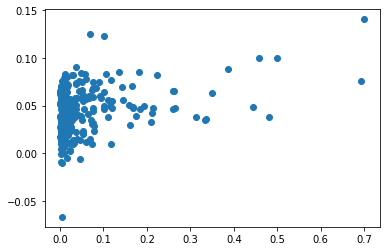

In [73]:
plt.scatter(y_test,lr_pred)

In [74]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(lrpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [ 0.06988014  0.05148091  0.05620143  0.02639638  0.05959631 -0.02526302
  0.09084036  0.07274705  0.03644625  0.03711797]
Mean of all scores:  0.04754437737138578


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

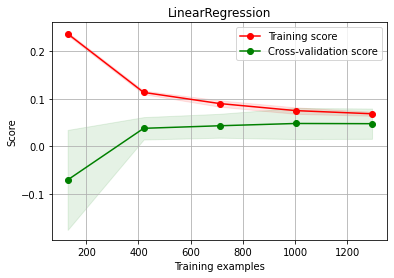

In [75]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [76]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
lspipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [77]:
lspipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [78]:
lasso_pred=lspipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
579,0.009055,0.041758
1183,0.210526,0.041758
1010,0.036747,0.041758
1527,0.018026,0.041758
77,0.002068,0.041758
...,...,...
268,0.005485,0.041758
708,0.031904,0.041758
31,0.066414,0.041758
1382,0.005450,0.041758


In [79]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\2318180480.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))


In [80]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 0.08824632999080315


In [81]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(lspipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.00785894 -0.02338868 -0.00496667 -0.0009593  -0.00372659 -0.01288985
 -0.00056432 -0.00556047 -0.00713888 -0.00021422]
Mean of all scores:  -0.006726790864649912


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

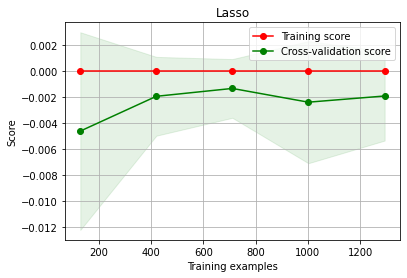

In [82]:
skplt.estimators.plot_learning_curve(lspipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [83]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
xgpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [84]:
xgpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [85]:
xgb_pred=xgpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
579,0.009055,0.013239
1183,0.210526,0.024797
1010,0.036747,0.045519
1527,0.018026,0.057878
77,0.002068,0.001177
...,...,...
268,0.005485,0.017560
708,0.031904,0.051861
31,0.066414,-0.016747
1382,0.005450,0.078569


In [86]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.4589247640844165


In [87]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 0.07840257255670263


In [88]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(xgpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [ 0.36424033 -0.0085039   0.53419068  0.3552353   0.62558874  0.15501345
  0.09393874  0.17696556 -0.16838211  0.06459845]
Mean of all scores:  0.21928852321732745


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

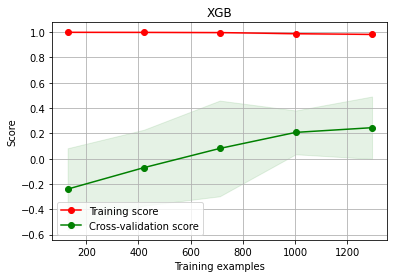

In [89]:
skplt.estimators.plot_learning_curve(xgpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [90]:
from sklearn.svm import SVR
sv=SVR()
svpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [91]:
svpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [92]:
svr_pred=svpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
579,0.009055,0.084508
1183,0.210526,0.101573
1010,0.036747,0.119995
1527,0.018026,0.107665
77,0.002068,0.080155
...,...,...
268,0.005485,0.079508
708,0.031904,0.109565
31,0.066414,0.095480
1382,0.005450,0.102394


In [93]:
print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\3628829903.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))


In [94]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 0.09537442882913816


In [95]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(svpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.76065395 -0.8980388  -0.32270245 -0.14699562 -0.3310905  -0.10057817
 -0.50444473 -0.13580664 -0.79223515 -0.2506471 ]
Mean of all scores:  -0.42431931051283966


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

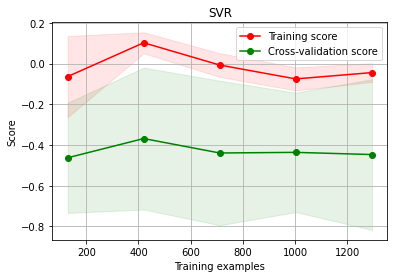

In [96]:
skplt.estimators.plot_learning_curve(svpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [98]:
dtrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [99]:
dtr_pred=dtrpipe.predict(X_test)

In [100]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
579,0.009055,0.006948
1183,0.210526,0.009739
1010,0.036747,0.036780
1527,0.018026,0.002522
77,0.002068,0.007262
...,...,...
268,0.005485,0.017465
708,0.031904,0.041326
31,0.066414,0.016902
1382,0.005450,0.014744


In [101]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\3199257659.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))


In [102]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 0.09238692161445694


In [103]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(dtrpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.79505009 -0.68305261  0.18763308  0.06747301 -0.59687796  0.06324144
 -0.27138301 -0.46683825 -0.61622521  0.30555422]
Mean of all scores:  -0.280552538892567


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

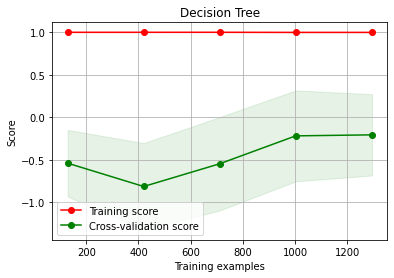

In [104]:
skplt.estimators.plot_learning_curve(dtrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [106]:
rfrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [107]:
rfr_pred=rfrpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
579,0.009055,0.008097
1183,0.210526,0.020889
1010,0.036747,0.053212
1527,0.018026,0.034373
77,0.002068,0.008878
...,...,...
268,0.005485,0.016960
708,0.031904,0.060820
31,0.066414,0.070808
1382,0.005450,0.053660


In [108]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.4988978084582139


In [109]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 0.07647759102547352


In [110]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(rfrpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.38522474 0.35543225 0.55107566 0.50373641 0.55632021 0.26944309
 0.1398323  0.29597326 0.31531918 0.20939335]
Mean of all scores:  0.3581750438625743


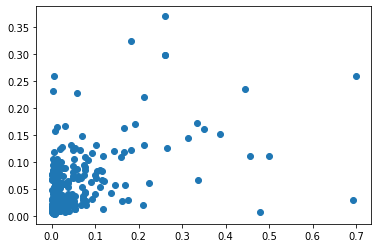

In [111]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

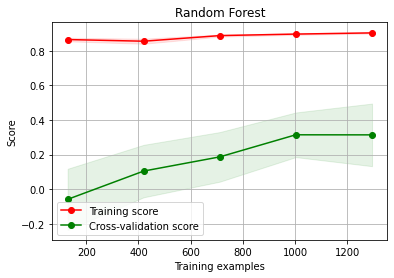

In [112]:
skplt.estimators.plot_learning_curve(rfrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
rfrsearch = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
rfrsearch.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [114]:
print(rfrsearch.best_params_)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 8}


In [115]:
print(rfrsearch.best_score_)

-0.004656447075690769


In [116]:
rfr_search=rfrsearch.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

,original test set,predictions
579,0.009055,0.010994
1183,0.210526,0.013344
1010,0.036747,0.047782
1527,0.018026,0.015123
77,0.002068,0.013838
...,...,...
268,0.005485,0.022074
708,0.031904,0.089946
31,0.066414,0.046886
1382,0.005450,0.088129


In [117]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.4736896856570126


In [118]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 0.07771574216756108


<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

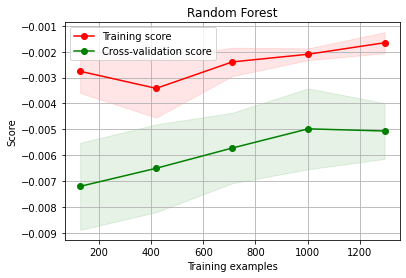

In [119]:
skplt.estimators.plot_learning_curve(rfrsearch,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [120]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1e-06}
-0.006573052774979727


In [121]:
lass_modelpred=lasso_model.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})

,original test set,predictions
579,0.009055,0.027190
1183,0.210526,0.032255
1010,0.036747,0.046303
1527,0.018026,0.047600
77,0.002068,0.024135
...,...,...
268,0.005485,0.024117
708,0.031904,0.054852
31,0.066414,0.057869
1382,0.005450,0.024267


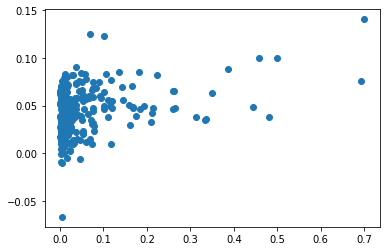

In [122]:
plt.scatter(y_test,lass_modelpred)

In [123]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.35103615783283737


In [124]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 0.0826282914019622


In [125]:
lasso_model.best_params_

{'alpha': 1e-06}

In [126]:
lasso_model.best_score_

-0.006573052774979727

<AxesSubplot:title={'center':'Lasso Regressor'}, xlabel='Training examples', ylabel='Score'>

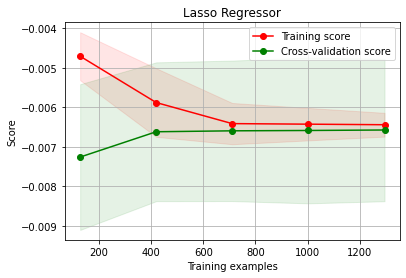

In [127]:
skplt.estimators.plot_learning_curve(lasso_model,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso Regressor')

In [128]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [129]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-0.004171385124353308
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [130]:
xgb_gridpred=xgb_grid.predict(X_test)

In [131]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
579,0.009055,0.010504
1183,0.210526,0.038403
1010,0.036747,0.052054
1527,0.018026,0.043371
77,0.002068,0.005628
...,...,...
268,0.005485,0.012583
708,0.031904,0.063021
31,0.066414,0.067417
1382,0.005450,0.098342


In [132]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.4862229282143637


In [133]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 0.07711065183144768


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[18:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

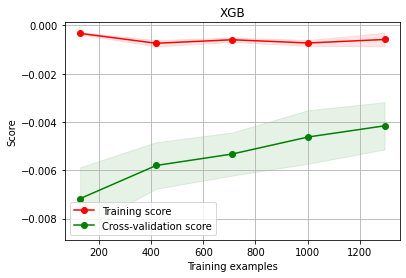

In [134]:
skplt.estimators.plot_learning_curve(xgb_grid,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

<AxesSubplot:>

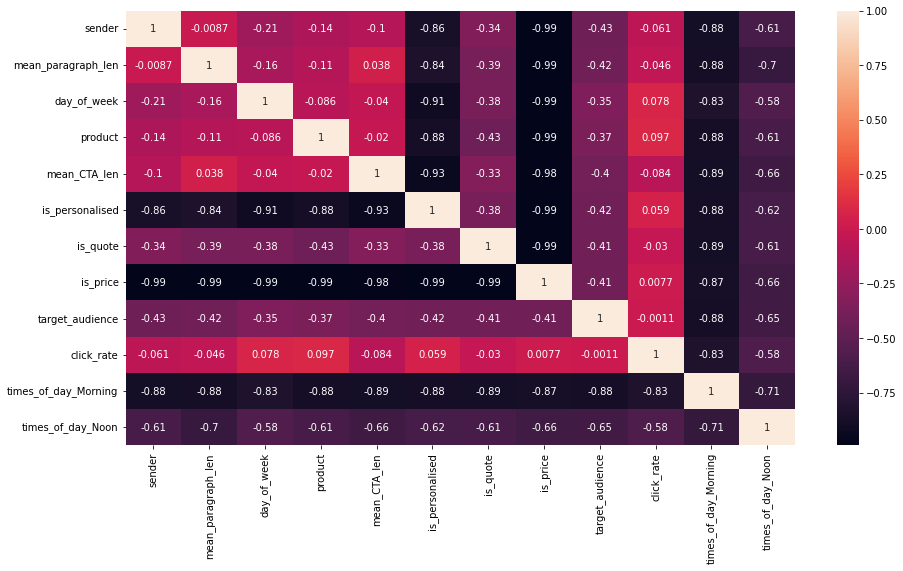

In [135]:
import seaborn as sns
corr = df1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [136]:
df2=df1.copy()

In [137]:
df2.columns

Index(['sender', 'mean_paragraph_len', 'day_of_week', 'product',
       'mean_CTA_len', 'is_personalised', 'is_quote', 'is_price',
       'target_audience', 'click_rate', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [138]:
df2.drop(['sender','day_of_week',
       'mean_CTA_len', 'is_quote',
       'target_audience','times_of_day_Morning'],axis=1,inplace=True)

In [139]:
df2.head()

,mean_paragraph_len,product,is_personalised,is_price,click_rate,times_of_day_Noon
0,39,26,0,0,0.103079,1
1,256,11,0,0,0.700000,0
2,16,11,0,0,0.002769,1
3,30,9,0,0,0.010868,0
4,27,26,0,0,0.142826,1


In [140]:
X=df2.copy()
X.drop(['click_rate'],axis=1,inplace=True)
X.head()

,mean_paragraph_len,product,is_personalised,is_price,times_of_day_Noon
0,39,26,0,0,1
1,256,11,0,0,0
2,16,11,0,0,1
3,30,9,0,0,0
4,27,26,0,0,1


In [141]:
y=df2['click_rate']

In [142]:
y

0       0.103079
1       0.700000
2       0.002769
3       0.010868
4       0.142826
          ...   
1883    0.350746
1884    0.004728
1885    0.008289
1886    0.012014
1887    0.003644
Name: click_rate, Length: 1888, dtype: float64

In [143]:
X_train.shape

(1510, 11)

In [144]:
lrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lr',LinearRegression())
])

In [145]:
lrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [146]:
lr_pred=lrpipe.predict(X_test)

In [147]:
pd.DataFrame({'original test set':y_test, 'predictions': lr_pred})

,original test set,predictions
579,0.009055,0.027185
1183,0.210526,0.032251
1010,0.036747,0.046299
1527,0.018026,0.047596
77,0.002068,0.024132
...,...,...
268,0.005485,0.024115
708,0.031904,0.054849
31,0.066414,0.057873
1382,0.005450,0.024267


In [148]:
from sklearn import metrics
print('r2:', np.sqrt(metrics.r2_score(y_test, lr_pred)))

r2: 0.35102236487361166


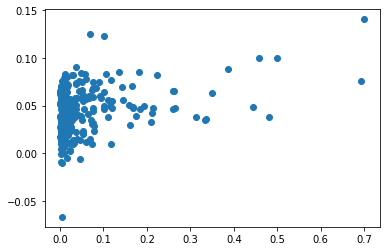

In [149]:
plt.scatter(y_test,lr_pred)

In [150]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(lrpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [ 0.06988014  0.05148091  0.05620143  0.02639638  0.05959631 -0.02526302
  0.09084036  0.07274705  0.03644625  0.03711797]
Mean of all scores:  0.04754437737138578


<AxesSubplot:title={'center':'LinearRegression'}, xlabel='Training examples', ylabel='Score'>

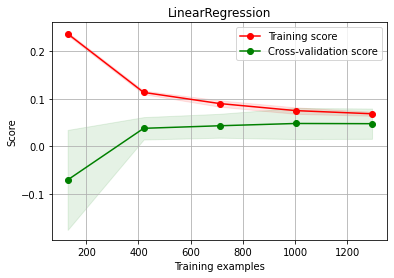

In [151]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='LinearRegression')

In [152]:
from sklearn.linear_model import Lasso
lass=Lasso(alpha=1.0)
lspipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('lass',Lasso(alpha=1.0))
])

In [153]:
lspipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lass', Lasso())])

In [154]:
lasso_pred=lspipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lasso_pred})

,original test set,predictions
579,0.009055,0.041758
1183,0.210526,0.041758
1010,0.036747,0.041758
1527,0.018026,0.041758
77,0.002068,0.041758
...,...,...
268,0.005485,0.041758
708,0.031904,0.041758
31,0.066414,0.041758
1382,0.005450,0.041758


In [155]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\2318180480.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, lasso_pred)))


In [156]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

RMSE: 0.08824632999080315


In [157]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(lspipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.00785894 -0.02338868 -0.00496667 -0.0009593  -0.00372659 -0.01288985
 -0.00056432 -0.00556047 -0.00713888 -0.00021422]
Mean of all scores:  -0.006726790864649912


<AxesSubplot:title={'center':'Lasso'}, xlabel='Training examples', ylabel='Score'>

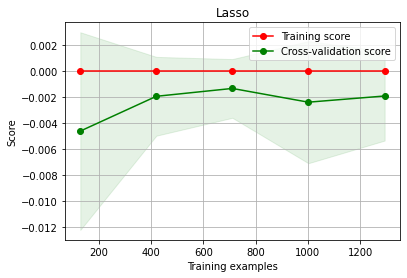

In [158]:
skplt.estimators.plot_learning_curve(lspipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso')

In [159]:
import xgboost as xgb
xg=Lasso(alpha=1.0)
xgpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('xgb',xgb.XGBRegressor())
])

In [160]:
xgpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [161]:
xgb_pred=xgpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': xgb_pred})

,original test set,predictions
579,0.009055,0.013239
1183,0.210526,0.024797
1010,0.036747,0.045519
1527,0.018026,0.057878
77,0.002068,0.001177
...,...,...
268,0.005485,0.017560
708,0.031904,0.051861
31,0.066414,-0.016747
1382,0.005450,0.078569


In [162]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_pred)))

r2: 0.4589247640844165


In [163]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

RMSE: 0.07840257255670263


In [164]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(xgpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [ 0.36424033 -0.0085039   0.53419068  0.3552353   0.62558874  0.15501345
  0.09393874  0.17696556 -0.16838211  0.06459845]
Mean of all scores:  0.21928852321732745


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

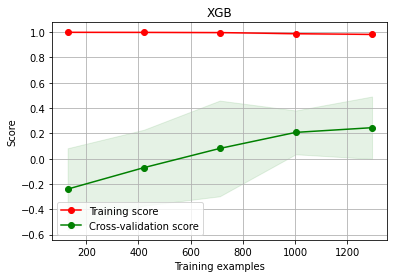

In [165]:
skplt.estimators.plot_learning_curve(xgpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')

In [166]:
from sklearn.svm import SVR
sv=SVR()
svpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('svr',SVR(kernel='rbf'))
])

In [167]:
svpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [168]:
svr_pred=svpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': svr_pred})

,original test set,predictions
579,0.009055,0.084508
1183,0.210526,0.101573
1010,0.036747,0.119995
1527,0.018026,0.107665
77,0.002068,0.080155
...,...,...
268,0.005485,0.079508
708,0.031904,0.109565
31,0.066414,0.095480
1382,0.005450,0.102394


In [169]:
print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\3628829903.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, svr_pred)))


In [170]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

RMSE: 0.09537442882913816


In [171]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(svpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.76065395 -0.8980388  -0.32270245 -0.14699562 -0.3310905  -0.10057817
 -0.50444473 -0.13580664 -0.79223515 -0.2506471 ]
Mean of all scores:  -0.42431931051283966


<AxesSubplot:title={'center':'SVR'}, xlabel='Training examples', ylabel='Score'>

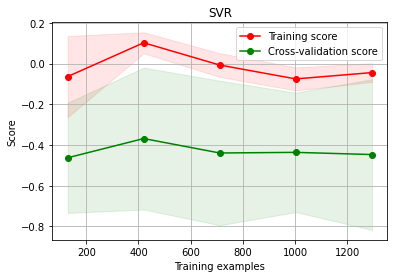

In [172]:
skplt.estimators.plot_learning_curve(svpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='SVR')

In [173]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('dtr',DecisionTreeRegressor())
])

In [174]:
dtrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [175]:
dtr_pred=dtrpipe.predict(X_test)

In [176]:
pd.DataFrame({'original test set':y_test, 'predictions': dtr_pred})

,original test set,predictions
579,0.009055,0.005512
1183,0.210526,0.009739
1010,0.036747,0.036780
1527,0.018026,0.002522
77,0.002068,0.006932
...,...,...
268,0.005485,0.019361
708,0.031904,0.041326
31,0.066414,0.016902
1382,0.005450,0.014744


In [177]:
print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))

r2: nan


C:\Users\899164\AppData\Local\Temp\2\ipykernel_11644\3199257659.py:1: RuntimeWarning: invalid value encountered in sqrt
  print('r2:', np.sqrt(metrics.r2_score(y_test, dtr_pred)))


In [178]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

RMSE: 0.09167120520542779


In [179]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(dtrpipe, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [-0.76121208 -0.53887959  0.22938586 -0.24903399  0.02782041  0.04032811
 -0.22291387 -0.7480581  -0.5882235   0.35337767]
Mean of all scores:  -0.24574090864721962


<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

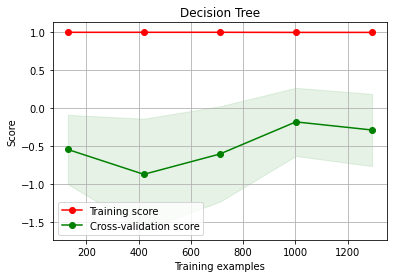

In [180]:
skplt.estimators.plot_learning_curve(dtrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Decision Tree')

In [181]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfrpipe = Pipeline(steps =[
    ('scaler', StandardScaler()), 
    ('rfr',RandomForestRegressor())
])

In [182]:
rfrpipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rfr', RandomForestRegressor())])

In [183]:
rfr_pred=rfrpipe.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_pred})

,original test set,predictions
579,0.009055,0.007961
1183,0.210526,0.015383
1010,0.036747,0.044531
1527,0.018026,0.034983
77,0.002068,0.009405
...,...,...
268,0.005485,0.017404
708,0.031904,0.049887
31,0.066414,0.058726
1382,0.005450,0.063324


In [184]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_pred)))

r2: 0.477241519180805


In [185]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

RMSE: 0.07754634491834983


In [186]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
cvs = cross_val_score(rfr, X_train, y_train, cv = cv)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.37859275 0.16316113 0.56448488 0.51470938 0.52476447 0.2623193
 0.1909797  0.37207278 0.31089378 0.19874047]
Mean of all scores:  0.3480718617030113


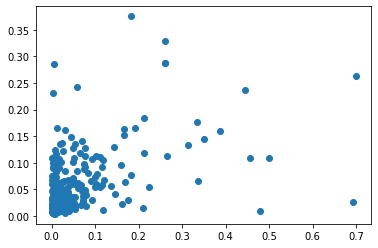

In [187]:
plt.scatter(y_test,rfr_pred)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

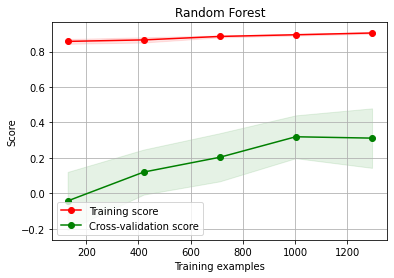

In [188]:
skplt.estimators.plot_learning_curve(rfrpipe,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [189]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True,False], 'max_depth': [5, 10, 15], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'min_samples_split' : [2, 5, 10, 15, 100],'min_samples_leaf' : [1, 2, 5, 10]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
rfrsearch = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = cv,scoring='neg_mean_squared_error', n_jobs = -1, verbose = 0, return_train_score=True)
rfrsearch.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [190]:
print(rfrsearch.best_params_)

{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 11}


In [191]:
print(rfrsearch.best_score_)

-0.004619847708940687


In [192]:
rfr_search=rfrsearch.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': rfr_search})

,original test set,predictions
579,0.009055,0.011897
1183,0.210526,0.010095
1010,0.036747,0.048743
1527,0.018026,0.058617
77,0.002068,0.010574
...,...,...
268,0.005485,0.029589
708,0.031904,0.058484
31,0.066414,0.109673
1382,0.005450,0.011818


In [193]:
print('r2:', np.sqrt(metrics.r2_score(y_test, rfr_search)))

r2: 0.4638626044836475


In [194]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_search)))

RMSE: 0.078175963880981


<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

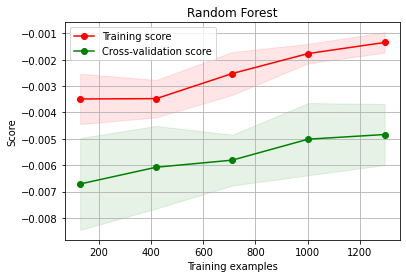

In [195]:
skplt.estimators.plot_learning_curve(rfrsearch,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Random Forest')

In [196]:
params = {'alpha': [1e-10,1e-6,1e-2,3,5,7,15,100,200,300,500,700]} # It will check from 1e-08 to 1e+08
lasso = Lasso()
cv=KFold(n_splits=10,random_state=1,shuffle=True)
lasso_model = GridSearchCV(lasso, params, cv = cv,scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1e-06}
-0.006573052774979727


In [197]:
lass_modelpred=lasso_model.predict(X_test)
pd.DataFrame({'original test set':y_test, 'predictions': lass_modelpred})

,original test set,predictions
579,0.009055,0.027190
1183,0.210526,0.032255
1010,0.036747,0.046303
1527,0.018026,0.047600
77,0.002068,0.024135
...,...,...
268,0.005485,0.024117
708,0.031904,0.054852
31,0.066414,0.057869
1382,0.005450,0.024267


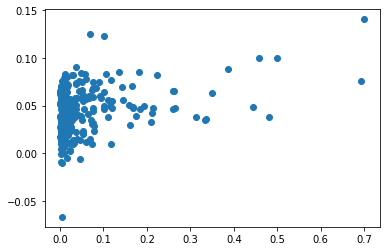

In [198]:
plt.scatter(y_test,lass_modelpred)

In [199]:
print('r2:', np.sqrt(metrics.r2_score(y_test, lass_modelpred)))

r2: 0.35103615783283737


In [200]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lass_modelpred)))

RMSE: 0.0826282914019622


In [201]:
lasso_model.best_params_

{'alpha': 1e-06}

In [202]:
lasso_model.best_score_

-0.006573052774979727

<AxesSubplot:title={'center':'Lasso Regressor'}, xlabel='Training examples', ylabel='Score'>

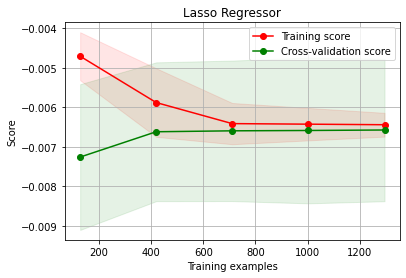

In [203]:
skplt.estimators.plot_learning_curve(lasso_model,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='Lasso Regressor')

In [204]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
cv=KFold(n_splits=10,random_state=1,shuffle=True)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=True,scoring='neg_mean_squared_error')

xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [205]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-0.004171385124353308
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [206]:
xgb_gridpred=xgb_grid.predict(X_test)

In [207]:
pd.DataFrame({'original test set':y_test, 'predictions': xgb_gridpred})

,original test set,predictions
579,0.009055,0.010504
1183,0.210526,0.038403
1010,0.036747,0.052054
1527,0.018026,0.043371
77,0.002068,0.005628
...,...,...
268,0.005485,0.012583
708,0.031904,0.063021
31,0.066414,0.067417
1382,0.005450,0.098342


In [208]:
print('r2:', np.sqrt(metrics.r2_score(y_test, xgb_gridpred)))

r2: 0.4862229282143637


In [209]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_gridpred)))

RMSE: 0.07711065183144768


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[19:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Paramet

<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

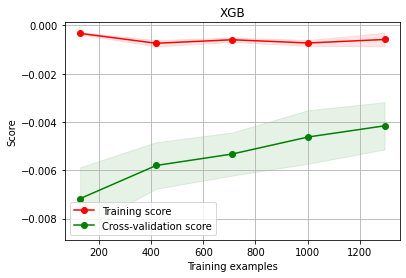

In [210]:
skplt.estimators.plot_learning_curve(xgb_grid,X_train,y_train,cv=7,figsize=(6,4),title_fontsize='large',title='XGB')